<a href="https://colab.research.google.com/github/wdgstl/assignment3/blob/main/WDG_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#1.)
car_df = pd.read_csv('/content/car_data (2).csv')

car_df.info()

car_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
#2.)

#Summarize Variables

print(car_df['User ID'])
print(car_df['User ID'])
print("Missing", car_df['User ID'].isna().sum())

print(car_df['Gender'])
print(car_df['Gender'])
print("Missing", car_df['Gender'].isna().sum())

print(car_df['Age'])
print(car_df['Age'])
print("Missing", car_df['Age'].isna().sum())

print(car_df['AnnualSalary'])
print(car_df['AnnualSalary'])
print("Missing", car_df['AnnualSalary'].isna().sum())

print(car_df['Purchased'])
print(car_df['Purchased'])
print("Missing", car_df['Purchased'].isna().sum())

print(car_df.describe())

#Convert Gender to Dummy

car_df["Gender"] = car_df["Gender"].apply(lambda x: 0 if x == "Male" else 1 if x == "Female" else x)

print(car_df.head())

print(car_df["Gender"])

#Create X Feature Matrix

X = car_df.loc[:,['Age','AnnualSalary']] # Create feature matrix

#Create y Outcome

y = car_df['Purchased'] # Create target variable vector

0      385
1      681
2      353
3      895
4      661
      ... 
995    863
996    800
997    407
998    299
999    687
Name: User ID, Length: 1000, dtype: int64
0      385
1      681
2      353
3      895
4      661
      ... 
995    863
996    800
997    407
998    299
999    687
Name: User ID, Length: 1000, dtype: int64
Missing 0
0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997    Female
998    Female
999    Female
Name: Gender, Length: 1000, dtype: object
0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997    Female
998    Female
999    Female
Name: Gender, Length: 1000, dtype: object
Missing 0
0      35
1      40
2      49
3      40
4      25
       ..
995    38
996    47
997    28
998    48
999    44
Name: Age, Length: 1000, dtype: int64
0      35
1      40
2      49
3      40
4      25
       ..
995    38
996    47
997    28
998    48
999    44
Name

In [ ]:
#3.)

#Max-Min Normalize

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
X.describe()


,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [ ]:
#4.)

#Split Data into Training / Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=12)


In [ ]:
#5.)
from sklearn.neighbors import KNeighborsClassifier
#Optimal Number of k neigbors

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k

print(k_star)

#Optimal k around 9

[9]


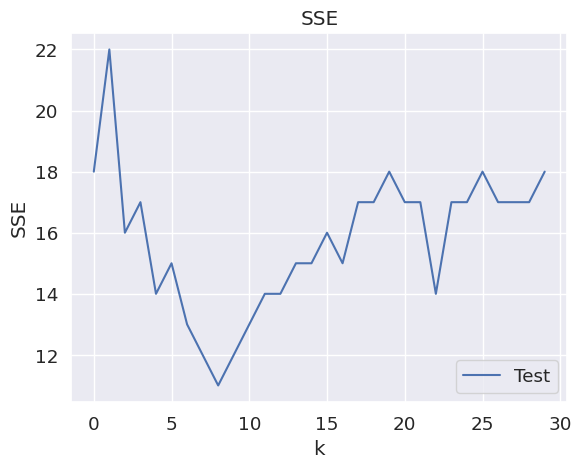

In [ ]:
plt.plot(np.arange(0,k_bar),SSE_test,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

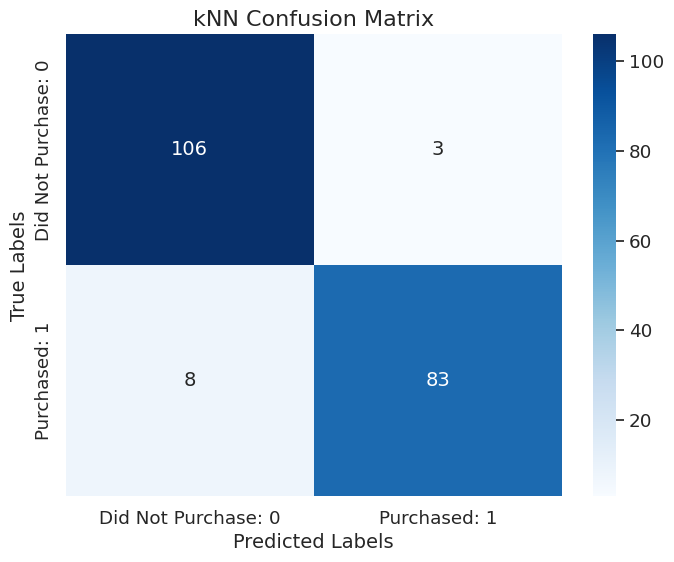


False Positive Rate: 0.027522935779816515 (Classifed as Purchased when Not Purchased)

False Negative Rate: 0.08791208791208792 (Classifed as Not Purchased when Purchased)

Accuracy: 0.945

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       109
           1       0.97      0.91      0.94        91

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [ ]:
#6.) Confusion Matrix + Metrics

model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train, y_train)

def get_metrics(model, X_test, y_test):
  predictions = model.predict(X_test)
  predictions = predictions.round()
  cm = confusion_matrix(y_test, predictions)
  # Create a heatmap
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.2)  # Adjust the font size for better readability

  # Customize the heatmap using a color palette
  heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

  # Add labels and title
  plt.xlabel('Predicted Labels', fontsize=14)
  plt.ylabel('True Labels', fontsize=14)
  plt.title("kNN Confusion Matrix", fontsize=16)

  # Customize the tick labels if needed
  heatmap.set_xticklabels(['Did Not Purchase: 0', 'Purchased: 1'])
  heatmap.set_yticklabels(['Did Not Purchase: 0', 'Purchased: 1'])

  plt.show()

  TN, FP, FN, TP = cm.ravel()

  FPR = FP / (FP + TN)
  FNR = FN / (FN + TP)

  print(f'\nFalse Positive Rate: {FPR} (Classifed as Purchased when Not Purchased)')
  print(f'\nFalse Negative Rate: {FNR} (Classifed as Not Purchased when Purchased)')

  print(f'\nAccuracy: {metrics.accuracy_score(y_test, predictions)}')

  print('\n', metrics.classification_report(y_test, predictions))

get_metrics(model, X_test, y_test)


#The false positive rate is 0.0275, which represents when the model predicts a purchase when there is not a purchase
#The false negative rate is 0.0879, which represents when the model does not predict a purchase when there is a purchase

#The model has an accuracy of .95, making it very accurate at classifying a purchase given Age and AnnualSalary



In [ ]:
#.7)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=12)
# Use the selected k to train the model, not using the gender variable:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model o
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for tes
# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 0]
y_hat_F = y_hat[ X_test['Gender'] == 1]
y_M = y_test[ X_test['Gender'] == 0]
y_F = y_test[ X_test['Gender'] == 1]

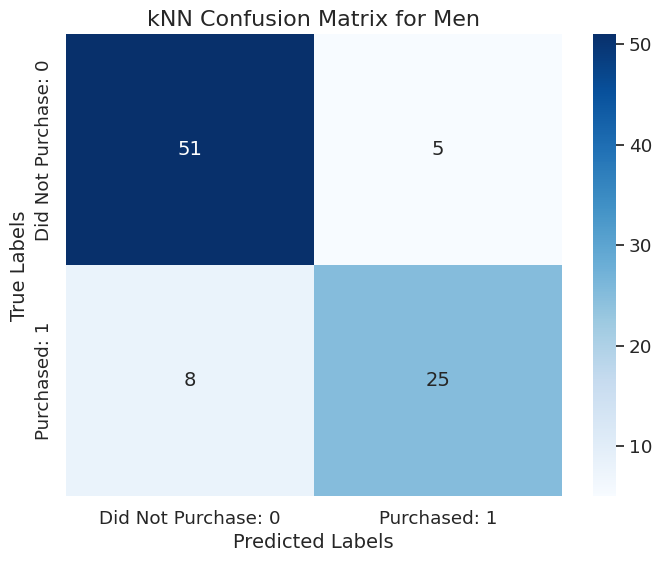


False Positive Rate: 0.08928571428571429 (Classifed as Purchased when Not Purchased)

False Negative Rate: 0.24242424242424243 (Classifed as Not Purchased when Purchased)

Accuracy: 0.8539325842696629

               precision    recall  f1-score   support

           0       0.86      0.91      0.89        56
           1       0.83      0.76      0.79        33

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [ ]:
#Male

cm = confusion_matrix(y_M, y_hat_M)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability

# Customize the heatmap using a color palette
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title("kNN Confusion Matrix for Men", fontsize=16)

# Customize the tick labels if needed
heatmap.set_xticklabels(['Did Not Purchase: 0', 'Purchased: 1'])
heatmap.set_yticklabels(['Did Not Purchase: 0', 'Purchased: 1'])

plt.show()

TN, FP, FN, TP = cm.ravel()

FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print(f'\nFalse Positive Rate: {FPR} (Classifed as Purchased when Not Purchased)')
print(f'\nFalse Negative Rate: {FNR} (Classifed as Not Purchased when Purchased)')

print(f'\nAccuracy: {metrics.accuracy_score(y_M, y_hat_M)}')


print('\n', metrics.classification_report(y_M, y_hat_M))

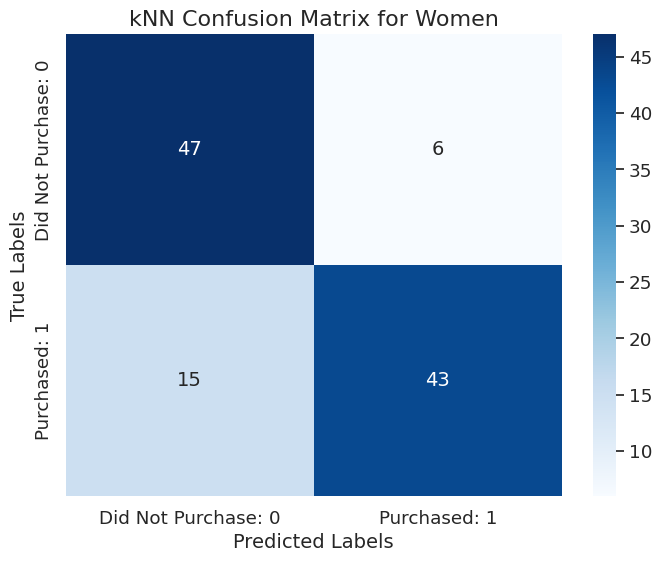


False Positive Rate: 0.11320754716981132 (Classifed as Purchased when Not Purchased)

False Negative Rate: 0.25862068965517243 (Classifed as Not Purchased when Purchased)

Accuracy: 0.8108108108108109

               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.88      0.74      0.80        58

    accuracy                           0.81       111
   macro avg       0.82      0.81      0.81       111
weighted avg       0.82      0.81      0.81       111



In [ ]:
#Female

cm = confusion_matrix(y_F, y_hat_F)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability

# Customize the heatmap using a color palette
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title("kNN Confusion Matrix for Women", fontsize=16)

# Customize the tick labels if needed
heatmap.set_xticklabels(['Did Not Purchase: 0', 'Purchased: 1'])
heatmap.set_yticklabels(['Did Not Purchase: 0', 'Purchased: 1'])

plt.show()

TN, FP, FN, TP = cm.ravel()

FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print(f'\nFalse Positive Rate: {FPR} (Classifed as Purchased when Not Purchased)')
print(f'\nFalse Negative Rate: {FNR} (Classifed as Not Purchased when Purchased)')

print(f'\nAccuracy: {metrics.accuracy_score(y_F, y_hat_F)}')

print('\n', metrics.classification_report(y_F, y_hat_F))

In [ ]:
#Results
#The model performed slighty better on men (accuracy = 85%) than on women (accuracy = 81%). This could be caused by a class imbalance, where the number of women in the population was not close enough to the number of men. Some ways to fix this include gathering more data, undersampling (removing some of the majority class), or oversampling (articially adding some of the minority class). These techniques all have different drawbacks and benefits

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
#1.)

USA_cars_df = pd.read_csv("/content/USA_cars_datasets (1).csv")

print(USA_cars_df.info())

USA_cars_df = USA_cars_df[["price", "year", "mileage"]]

print(USA_cars_df.info())
print(USA_cars_df.head())

print("Missing", USA_cars_df['price'].isna().sum())
print("Missing", USA_cars_df['year'].isna().sum())
print("Missing", USA_cars_df['mileage'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null 

In [ ]:
#2.)
#Max-Min Normalize

#Create X Feature Matrix

X = USA_cars_df.loc[:,['year','mileage']] # Create feature matrix

#Create y Outcome

y = USA_cars_df['price'] # Create target variable vector

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)

In [ ]:
#3.)

#Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


SSE for 3 = 63223286609.11111


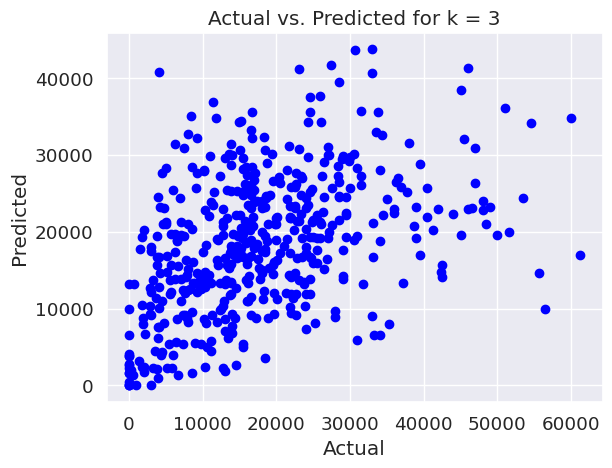

SSE for 10 = 55401092793.409996


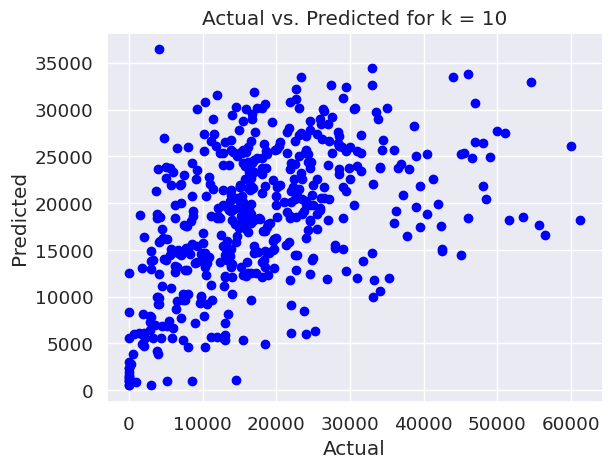

SSE for 25 = 51585228924.304


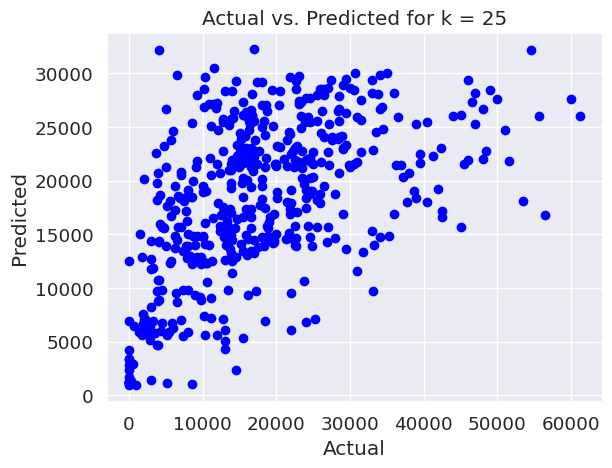

SSE for 50 = 49847721982.09799


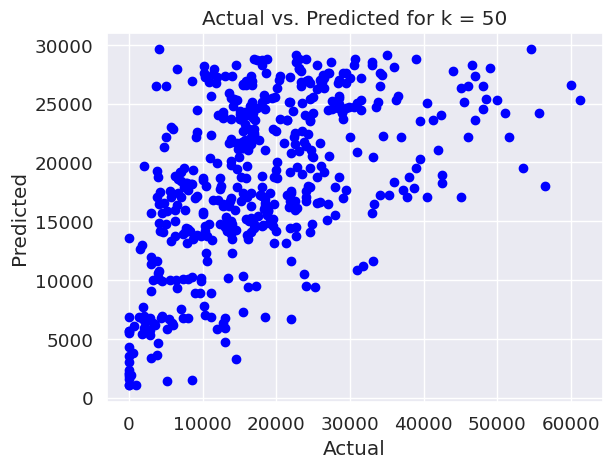

SSE for 100 = 49135529480.4603


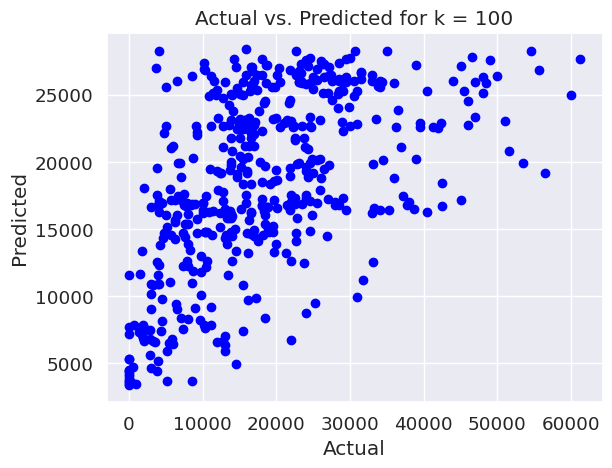

SSE for 300 = 50238649457.106


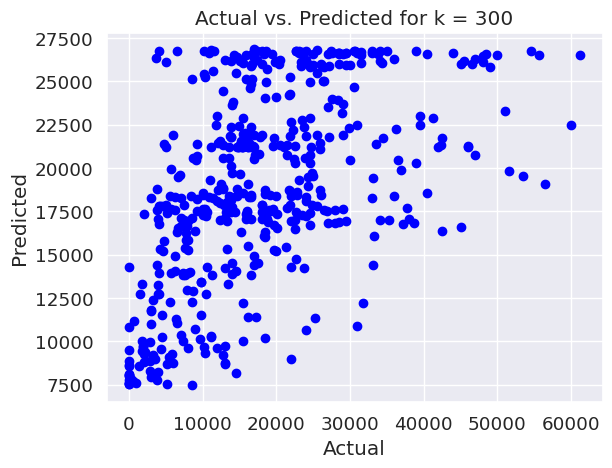

In [ ]:
#4.)
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

#Models
ks = [3,10,25,50,100,300]
SSEs = []

for idx, k in enumerate(ks):
  model = kNNRegression(n_neighbors=k) # Create a sk model for k=3
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSEs.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE
  print(f'SSE for {k} = {SSEs[idx]}')
  plt.scatter(y_test ,y_hat , color='blue')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title(f'Actual vs. Predicted for k = {k}')
  plt.show()



In [ ]:
#5.)

#Optimal k

k_bar = 300
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

#Optimal k = 77

[77]


In [ ]:
#6.)

#The plots got more linear (a stronger positive correlation) as k increased up to 100. This was also indicated by a decreasing SSE, which means the predictions are closer to the true values. However, the SSE increased beyond 100 and the scatterplot had less of a trend. This explains why the optimal k is 77. The k value cannot be too low because this would produce an overly simple model that would be prone to underfitting, which means it would not be able to learn its own training data well enough which would make it hard to generalize. Having a k that is too large could make the model too complex, which would make it prone to overfitting as it could simply "memorize" the training data, also making it prone to overfitting. The key is to find a balance between the two, which is why k = 77 is optimal.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

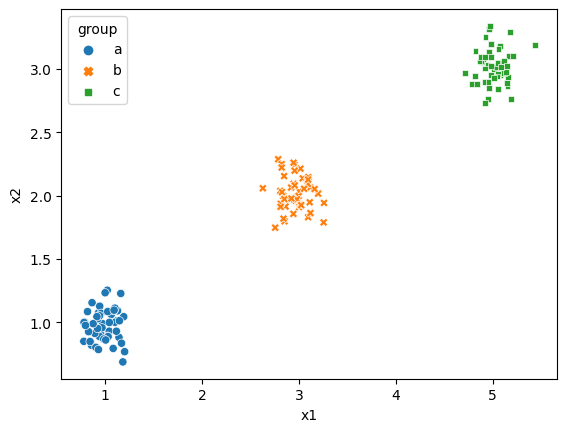

In [23]:
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue = 'group', style = 'group' )

<Axes: xlabel='x1', ylabel='x2'>

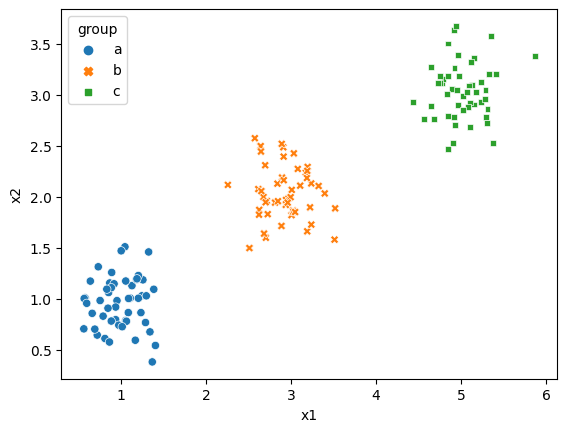

In [24]:
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2', hue = 'group', style = 'group' )

<Axes: xlabel='x1', ylabel='x2'>

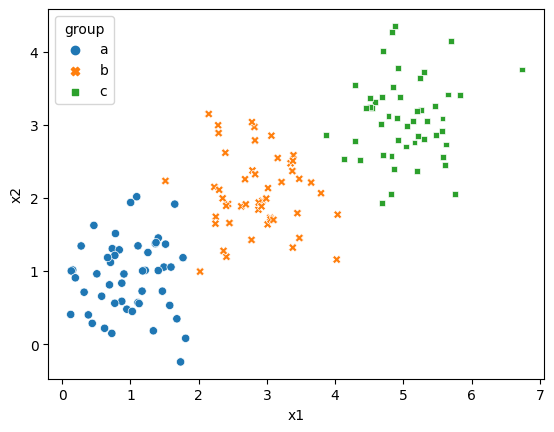

In [25]:
sns.scatterplot(data = df0_5, x = 'x1', y = 'x2', hue = 'group', style = 'group' )

<Axes: xlabel='x1', ylabel='x2'>

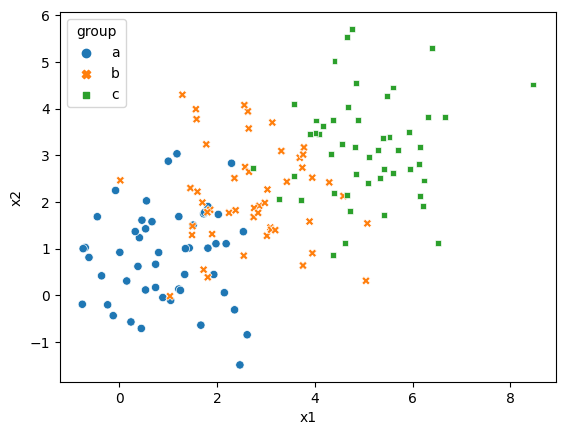

In [26]:
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue = 'group', style = 'group' )

<Axes: xlabel='x1', ylabel='x2'>

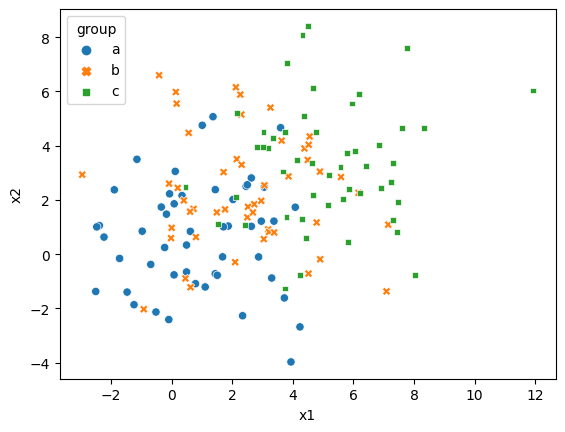

In [27]:
sns.scatterplot(data = df2_0, x = 'x1', y = 'x2', hue = 'group', style = 'group' )

2. As the noise goes up, the visual distinctness decreases and the clusters are a lot less clear. This is because adding noise adds random variations to the data points, making the clusters overlap more and making them a lot less evident.

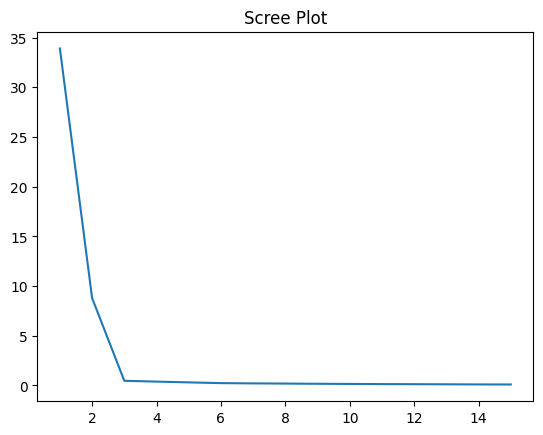

In [29]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

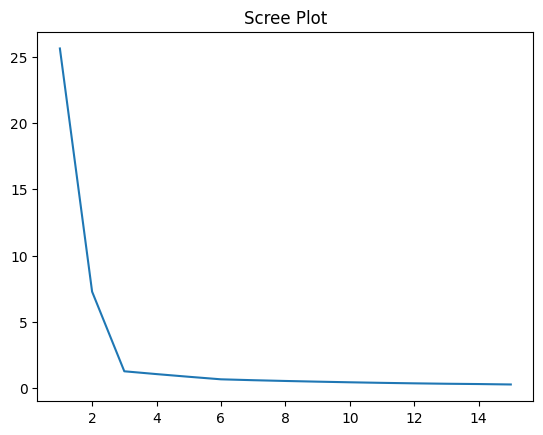

In [30]:
# Preprocess the data:
X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

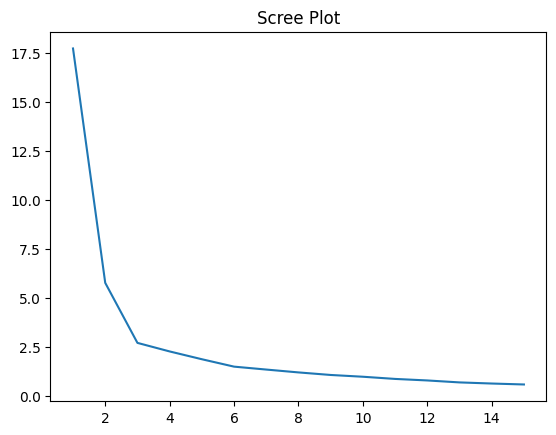

In [31]:
# Preprocess the data:
X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

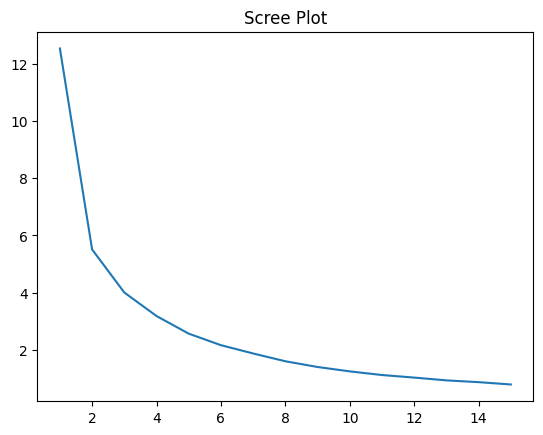

In [32]:
# Preprocess the data:
X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

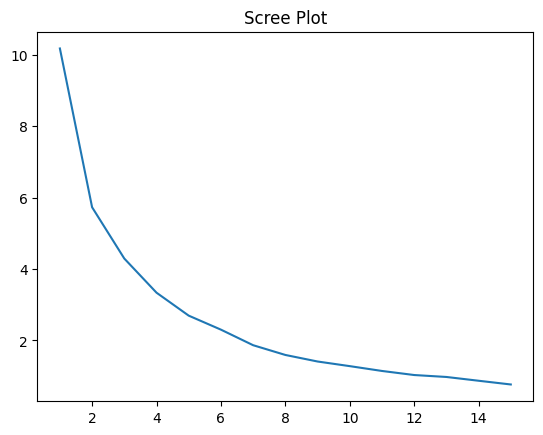

In [33]:
# Preprocess the data:
X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

3. The elbow is more apparent when there is less noise. As noise is added, the elbow curves and is less aparent, which is because the increased variance makes it more difficult to uniquely cluster points.

4. The elbow represents the point at which adding more clusters does not improve the quality of the clustering solution. Adding more noise increases variance and means that it is more difficult to define the optimal number of clusters since there is so much overlap. When the clusters are visually distinct, the elbow will show a clear point in which the cluster solution is not improved by the addition of more clusters.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?